# Machine Learning Project - Heart Disease 
### Exploratory Data Analysis and Logistic Regression

Dataset:
http://archive.ics.uci.edu/ml/datasets/heart+Disease


## Step 1: Setup and Importing the Data to Pandas

In this step I import the .data file into a pandas DataFrame for subsequent data exploration and machine learning.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the File, with missing values (-9) as NaN
# Source: https://www.askpython.com/python/examples/read-data-files-in-python
data = pd.read_csv('heart.disease.data', sep=',', na_values = -9)

data.head()

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,NaN,1,2,150,0,6.0,0
1,67,1,4,160,286,40.0,40.0,0,NaN,1,2,108,1,3.0,2
2,67,1,4,120,229,20.0,35.0,0,NaN,1,2,129,1,7.0,1
3,37,1,3,130,250,0.0,0.0,0,NaN,1,0,187,0,3.0,0
4,41,0,2,130,204,0.0,0.0,0,NaN,1,2,172,0,3.0,0


## Step 2: Look at the Data with EDA

In this step I explore the data using a number of functions.  I find that there are 282 entries with 15 attributes.  Most of the attributes are not missing data, however the categories 'cigs', 'years', 'dm', and 'thal' are missing some datapoints.  The 'dm' attribute is missing datapoints for most of the entries.  I will most likely need to drop this column, while imputing the rest of the missing data.

I also explore the data using the .describe() method.  This shows descriptive statistics and quartiles for each attribute.  Soem outliers are clearly present, such as the max value of 99 for the 'cigs' attribute, which represents an individual smoking 99 cigarettes per day.  I will deal with outliers in a later step. 

Then I explore the unique values for each attribute.  I see which attributes have the NaN values, see a different view of the outliers, and also get a good idea of which attributes are categorical, ordinal, and interval.  For example:
- 'sex' is categorical and binary; either male or female
- 'restecg' is ordinal with an ordering of normal and abnormal heartbeats
- 'cigs' is interval data and represents cigarettes smoked per day

Further below, histograms of each attribute demonstrate the disribution of datapoints and visually show which data is categorical and such.

Finally, I look at the correlation matrices for many of the attributes.  The target attribute 'num', is most positively correlated with 'thal' (0.504), 'exang' (0.399), and 'cp' (0.384); while being negatively correlated with 'thalach' (-0.396).  Attributes with low correlation such as 'famhist', 'cigs', 'fbs' could potentially be droppbed, but since this dataset is not very big, I will probably keep all of those attributes.

In [2]:
# Show number of rows and columns
data.shape

(282, 15)

In [3]:
# show a summary of the data attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      277 non-null    float64
 6   years     277 non-null    float64
 7   fbs       282 non-null    int64  
 8   dm        23 non-null     float64
 9   famhist   282 non-null    int64  
 10  restecg   282 non-null    int64  
 11  thalach   282 non-null    int64  
 12  exang     282 non-null    int64  
 13  thal      280 non-null    float64
 14  num       282 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 33.2 KB


From the dataset's website, the attributes are described below:
- 'age': age in years
- 'sex': sex (1 = male; 0 = female)
- 'cp': chest pain type
 -- Value 1: typical angina
 -- Value 2: atypical angina
 -- Value 3: non-anginal pain
 -- Value 4: asymptomatic
- 'trestbps': resting blood pressure (in mm Hg on admission to the hospital)
- 'chol': serum cholestoral in mg/dl
- 'cigs': cigarettes per day
- 'years': number of years as a smoker
- 'fbs': (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- 'dm': (1 = history of diabetes; 0 = no such history)
- 'famhist':  family history of coronary artery disease (1 = yes; 0 = no)
- 'restecg': resting electrocardiographic results
 -- Value 0: normal
 -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- 'thalach': maximum heart rate achieved
- 'exang': exercise induced angina (1 = yes; 0 = no)
- 'thal': 3 = normal; 6 = fixed defect; 7 = reversable defect
- 'num': diagnosis of heart disease (angiographic disease status)
 -- Value 0: < 50% diameter narrowing
 -- Value 1: > 50% diameter narrowing

In [4]:
# Descriptive statistics of the attributes
data.describe()

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,277.000000,277.000000,282.000000,23.0,282.000000,282.000000,282.000000,282.000000,280.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,16.920578,15.259928,0.148936,1.0,0.620567,1.014184,149.765957,0.326241,4.678571,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,19.451934,15.367867,0.356658,0.0,0.486108,0.998118,22.923869,0.469670,1.939101,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,71.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,10.000000,15.000000,0.000000,1.0,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,1.0,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,99.000000,54.000000,1.000000,1.0,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


In [5]:
#Print unique values for each column.  Notice the ranges, outliers, and NaN values.

# Get column names
col_names = data.columns.values

# Loop through column names and print the unique values found in each one
for col in col_names:
    print("###############################")
    print(col)
    print(data[col].unique())

###############################
age
[63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
###############################
sex
[1 0]
###############################
cp
[1 4 3 2]
###############################
trestbps
[145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154]
###############################
chol
[233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 31

### Histograms

Below is the construction of histograms for each attribute. The attributes 'age', 'years', 'trestbps', 'chol', and 'thalach' are numeric and continuous.  The attributes 'sex', 'dm', 'famhist', 'fbs', 'restecg', and 'exang' are all binary categories.  The remaining attributes are categorical with more than two categories.  The numeric attributes do not appear to be normally distributed.

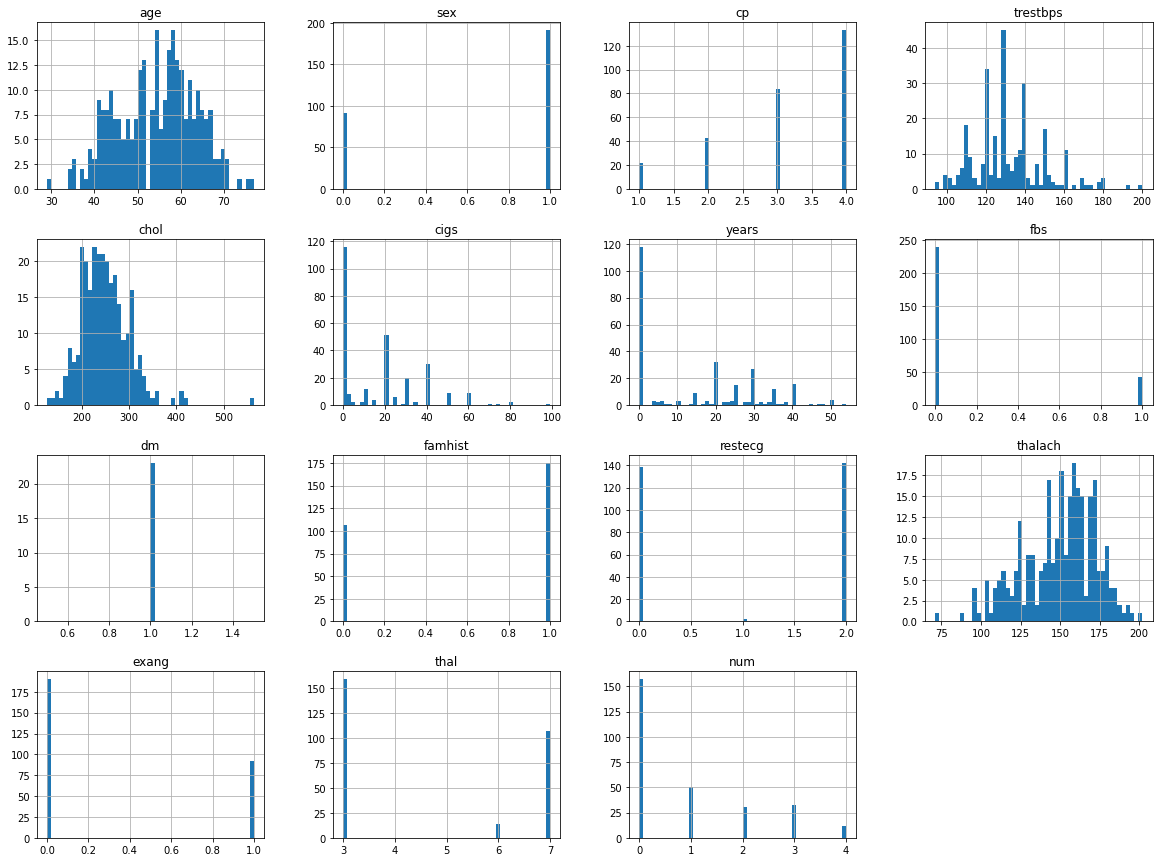

In [6]:
# Make Histograms of the data.  Look at distributions, types of data (categorical vs interval, etc), and outliers.

#Source: Geron, A (2019) Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

#### Correlations

The correlations below show how much one variable changes with all the other attributes, either positively or negatively.  None of the correlations I checked were either that strongly positve or negative.  The highest correlation I found was between years smoking and cigarettes smoked per day.  This pattern seems to make sense.

As noted above, the target attribute 'num', is most positively correlated with 'thal' (0.504), 'exang' (0.399), and 'cp' (0.384); while being negatively correlated with 'thalach' (-0.396).  

In [7]:
# Correlation Matrix
corr_matrix = data.corr()

In [8]:
# Correlation of age of patient with the other attributes
corr_matrix["age"].sort_values(ascending=False)

age         1.000000
trestbps    0.274466
chol        0.218295
num         0.210747
restecg     0.134438
fbs         0.104400
thal        0.104029
exang       0.087174
cp          0.077383
years       0.068362
famhist     0.025888
sex        -0.091125
cigs       -0.126225
thalach    -0.393266
dm               NaN
Name: age, dtype: float64

In [9]:
# Correlation of patient's sex with other attributes.
corr_matrix["sex"].sort_values(ascending=False)

sex         1.000000
thal        0.391405
cigs        0.331826
years       0.241897
num         0.239516
exang       0.189095
fbs         0.054396
restecg     0.032665
cp          0.022619
thalach    -0.054792
trestbps   -0.058920
famhist    -0.070785
age        -0.091125
chol       -0.189397
dm               NaN
Name: sex, dtype: float64

In [10]:
# Correlation of patient's resting blood pressure with other attributes.
corr_matrix["trestbps"].sort_values(ascending=False)

trestbps    1.000000
age         0.274466
chol        0.157118
num         0.151776
fbs         0.142902
restecg     0.128652
thal        0.123241
exang       0.061072
years       0.057853
famhist     0.057441
cigs       -0.028036
thalach    -0.029739
sex        -0.058920
cp         -0.070886
dm               NaN
Name: trestbps, dtype: float64

In [11]:
# Correlation of patient's diagnosis of heart disease (target variable) with other attributes.
corr_matrix["num"].sort_values(ascending=False)

num         1.000000
thal        0.504393
exang       0.398880
cp          0.383891
sex         0.239516
age         0.210747
restecg     0.187365
trestbps    0.151776
chol        0.098895
years       0.077537
famhist     0.048619
cigs        0.045804
fbs         0.039690
thalach    -0.396194
dm               NaN
Name: num, dtype: float64

In [13]:
# Correlation of patient's excercise induced angina with other attributes.
corr_matrix["exang"].sort_values(ascending=False)

exang       1.000000
num         0.398880
cp          0.364757
thal        0.335830
sex         0.189095
chol        0.088988
restecg     0.088781
age         0.087174
trestbps    0.061072
cigs        0.048492
fbs         0.027573
years       0.014877
famhist    -0.001437
thalach    -0.374316
dm               NaN
Name: exang, dtype: float64

In [14]:
# Correlation of patient's chest pain type with other attributes.
corr_matrix["cp"].sort_values(ascending=False)

cp          1.000000
num         0.383891
exang       0.364757
thal        0.259586
famhist     0.110754
chol        0.098889
cigs        0.086434
age         0.077383
years       0.077244
restecg     0.061007
sex         0.022619
trestbps   -0.070886
fbs        -0.071550
thalach    -0.318512
dm               NaN
Name: cp, dtype: float64

In [15]:
# Correlation of patient's cigarettes smoked per day with other attributes.
corr_matrix["cigs"].sort_values(ascending=False)

cigs        1.000000
years       0.641865
sex         0.331826
thal        0.193125
cp          0.086434
fbs         0.051444
exang       0.048492
num         0.045804
thalach    -0.005464
trestbps   -0.028036
restecg    -0.029655
famhist    -0.033441
chol       -0.102150
age        -0.126225
dm               NaN
Name: cigs, dtype: float64

## Step 3: Impute Missing Data

As shown in the output below, the following columns have missing values (-9):
- cigs  (cigarettes per day)
- years (number of years as a smoker)
- dm (1 = history of diabetes; 0 = no such history)
- thal (3 = normal; 6 = fixed defect; 7 = reversable defect)

Here, I replace NaN values for 'cigs', 'years', and 'thal' using the median.  I don't impute any of the 'dm' NaN values because I will be dropping the entire column.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      277 non-null    float64
 6   years     277 non-null    float64
 7   fbs       282 non-null    int64  
 8   dm        23 non-null     float64
 9   famhist   282 non-null    int64  
 10  restecg   282 non-null    int64  
 11  thalach   282 non-null    int64  
 12  exang     282 non-null    int64  
 13  thal      280 non-null    float64
 14  num       282 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 33.2 KB


In [18]:
# Replace NaN values with the median values for the attribute
# Source: Week 1 Lecture
data['cigs'].fillna(data['cigs'].dropna().median(), inplace=True)
data['years'].fillna(data['years'].dropna().median(), inplace=True)
data['thal'].fillna(data['thal'].dropna().median(), inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      282 non-null    float64
 6   years     282 non-null    float64
 7   fbs       282 non-null    int64  
 8   dm        23 non-null     float64
 9   famhist   282 non-null    int64  
 10  restecg   282 non-null    int64  
 11  thalach   282 non-null    int64  
 12  exang     282 non-null    int64  
 13  thal      282 non-null    float64
 14  num       282 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 33.2 KB


## Step 4: Drop Unnecessary Columns

Here, I decide to drop the 'dm' column because it only had 23 recorded instances.  The rest of the 282 rows were NaN's, or empty values.  It would not make sense to impute the value for 282 rows based on 23. The dm variable represents the patient's history of diabetes.  This factor could play a role in the output variable, but with such litte recorded info, I decide to drop the whole column. 

I considered dropping other columns which had low absolute value correlations with the result attribute, but since the data size is not significant, I decided to leave them in.  I erred on the side of caution, just in case some signal could be gleaned from these attributes despite low correlations.


In [20]:
# Remove the unnecessary column and confirm that it worked.
# Source: Week 1 Lecture
data = data.drop(['dm'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      282 non-null    float64
 6   years     282 non-null    float64
 7   fbs       282 non-null    int64  
 8   famhist   282 non-null    int64  
 9   restecg   282 non-null    int64  
 10  thalach   282 non-null    int64  
 11  exang     282 non-null    int64  
 12  thal      282 non-null    float64
 13  num       282 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 31.0 KB


## Step 5: Deal with Outliers

In this step I remove outliers.  I first plot the box plots to identify which attributes have outliers (represented by the circles in each box plot).  Then I use pandas to sort the values (either ascending or descending depending on where the box plot shows the outliers to be), and then I remove the outliers from the columns.

I ended up removing outliers from the 'trestbps', 'chol', 'cigs', and 'thalach' attributes. Removing the outliers will give the model more normal data to glean generalized patterns from, without the noise from the outliers.

age            AxesSubplot(0.125,0.657941;0.133621x0.222059)
sex         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
cp           AxesSubplot(0.44569,0.657941;0.133621x0.222059)
trestbps    AxesSubplot(0.606034,0.657941;0.133621x0.222059)
chol        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
cigs           AxesSubplot(0.125,0.391471;0.133621x0.222059)
years       AxesSubplot(0.285345,0.391471;0.133621x0.222059)
fbs          AxesSubplot(0.44569,0.391471;0.133621x0.222059)
famhist     AxesSubplot(0.606034,0.391471;0.133621x0.222059)
restecg     AxesSubplot(0.766379,0.391471;0.133621x0.222059)
thalach           AxesSubplot(0.125,0.125;0.133621x0.222059)
exang          AxesSubplot(0.285345,0.125;0.133621x0.222059)
thal            AxesSubplot(0.44569,0.125;0.133621x0.222059)
num            AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

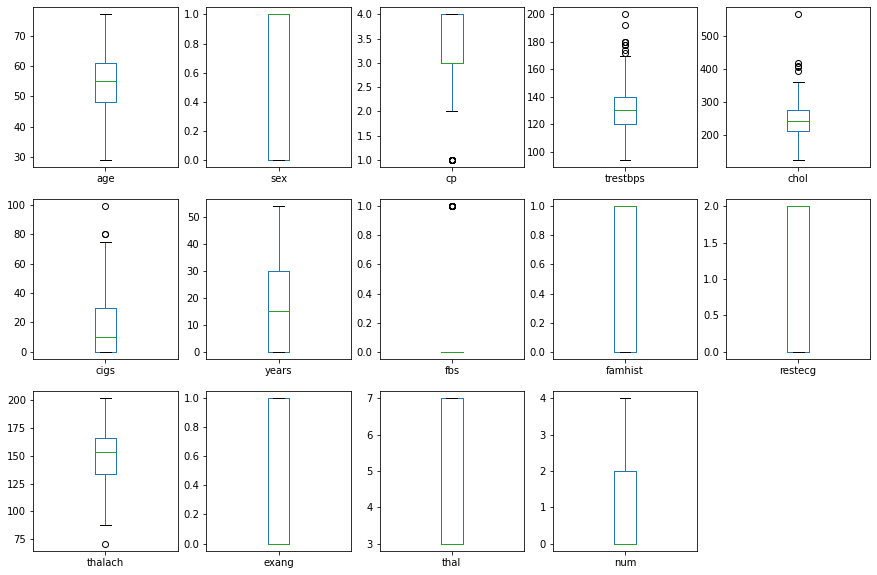

In [21]:
# Plot box plots
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
data.plot(kind='box', subplots=True, layout=(3,5),
sharex=False,sharey=False, figsize=(15, 10))

In [22]:
#Find Outliers
# Source:https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

data = data.sort_values('trestbps', ascending=False)
data['trestbps'].head(15)

126    200
188    192
231    180
201    180
83     180
183    178
213    178
172    174
14     172
141    170
68     170
275    170
146    165
234    160
91     160
Name: trestbps, dtype: int64

In [23]:
# Drop all values 180 and above for trestbps
#Source: https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
data = data[data['trestbps'] < 180] 

In [24]:
#chol
data = data.sort_values('chol', ascending=False)
data['chol'].head(15)

152    564
48     417
181    409
121    407
173    394
75     360
7      354
38     353
113    341
26     340
280    335
32     335
44     330
118    330
68     326
Name: chol, dtype: int64

In [25]:
# Drop all values above 400 for chol
data = data[data['chol'] <= 400] 

In [26]:
#cigs
data = data.sort_values('cigs', ascending=False)
data['cigs'].head(15)

39     99.0
263    80.0
74     80.0
10     75.0
146    70.0
120    60.0
168    60.0
63     60.0
64     60.0
62     60.0
99     60.0
46     60.0
237    60.0
38     60.0
57     50.0
Name: cigs, dtype: float64

In [27]:
#Drop all values 80 and above for cigs
data = data[data['cigs'] < 80] 

In [28]:
#thalach
data = data.sort_values('thalach')
data['thalach'].head(15)

245     71
175     88
223     95
154     96
244     96
114     97
72      99
236    103
137    103
177    105
252    105
251    105
193    106
228    108
1      108
Name: thalach, dtype: int64

In [29]:
#Drop the 71 value for thalach
data = data[data['thalach'] > 71] 

In [43]:
# Shwo final shape of the data.  13 rows have been removed as outliers.
data.shape

(269, 13)

## Step 6: Provide Brief Summary of Data Preparation

To prepare the data for machine learning, I undertake the following steps:
- One-Hot Encoding
- Editing the target variable 'num' to be binary, as the dataset website suggests that it is, but the data does not show.
- Remove the label attribute from the dataset as it's own DataFrame, called y_targets
- split the remaining data into train and test sets
- Feature scaling to normalize the data based on attribute mean and standard deviation. This allows an apples to apples comparison across features by the model.

From here, the data is ready to input into a model for training and testing.  I perform some simple machine learning with a logistic regression model and get an accuracy score of around 76%.  Compared to the baseline model of randomly picking and theroetically getting a 50% accuracy, the logistic regression model does much better. 

In [31]:
data.head()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
175,57,1,4,152,274,40.0,20.0,0,1,0,88,1,7.0,1
223,53,1,4,123,282,0.0,0.0,0,0,0,95,1,7.0,3
154,64,1,4,120,246,0.0,0.0,0,1,2,96,1,3.0,3
244,60,0,3,120,178,0.0,0.0,1,0,0,96,0,3.0,0
114,62,0,3,130,263,0.0,0.0,0,1,0,97,0,7.0,2


In [32]:
#One-hot encoding of thal because it is a categorical variable with possible values of 3, 6, and 7.
#The differences in values are arbitrary but could be read as a pattern by the model.
#Other categorical values could be encoded, but many are binary, which wouldn't make sense to do, and 
#the others are on a continuous scale, which don't have the big differences in value that 'thal' has.

#source: Geron, A (2019) Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition

patient_thal = data[["thal"]]

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
patient_thal_encoded = ordinal_encoder.fit_transform(patient_thal)
#patient_thal_encoded[:10]

data['thal_encoded'] = patient_thal_encoded
data = data.drop(['thal'], axis=1)
data.head()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,num,thal_encoded
175,57,1,4,152,274,40.0,20.0,0,1,0,88,1,1,2.0
223,53,1,4,123,282,0.0,0.0,0,0,0,95,1,3,2.0
154,64,1,4,120,246,0.0,0.0,0,1,2,96,1,3,0.0
244,60,0,3,120,178,0.0,0.0,1,0,0,96,0,0,0.0
114,62,0,3,130,263,0.0,0.0,0,1,0,97,0,2,2.0


In [33]:
# The num attribute is our target. The UCI website says this variable is suppossed to be binary, with 0 inidicating
# < 50% diameter narrowing and 1 indicating > 50% diameter narrowing.  But the dataset given has values of 0,1,2,and 3
# for this variable. I replace all 2s and 3s with 1s to make the attribute binary.

data['num_binary'] = data['num'].replace(2, 1)
data['num_binary'] = data['num_binary'].replace(3, 1)
data = data.drop(['num'], axis=1)
data.head(15)

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal_encoded,num_binary
175,57,1,4,152,274,40.0,20.0,0,1,0,88,1,2.0,1
223,53,1,4,123,282,0.0,0.0,0,0,0,95,1,2.0,1
154,64,1,4,120,246,0.0,0.0,0,1,2,96,1,0.0,1
244,60,0,3,120,178,0.0,0.0,1,0,0,96,0,0.0,0
114,62,0,3,130,263,0.0,0.0,0,1,0,97,0,2.0,1
72,62,1,4,120,267,20.0,30.0,0,1,0,99,1,2.0,1
236,56,1,4,130,283,20.0,14.0,1,1,2,103,1,2.0,1
137,62,1,2,120,281,20.0,25.0,0,1,2,103,0,2.0,1
177,56,1,4,132,184,40.0,20.0,0,1,2,105,1,1.0,1
252,64,1,4,128,263,40.0,35.0,0,1,0,105,1,2.0,0


In [34]:
# Split into train and test data (and label)

# Separate target variable from the dataset and remove it
y_targets = data['num_binary']

data.drop('num_binary', inplace=True, axis=1)

print(y_targets.head(10))

175    1
223    1
154    1
244    0
114    1
72     1
236    1
137    1
177    1
252    0
Name: num_binary, dtype: int64


In [35]:
# Spit the dataset into x_train, x_test, y_train, y_test.  
# Source: Chollet, F. (2018). Deep learning with Python. Manning Publications.
# Sourced used extensively in MSDS 684 - Deep Learning

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, y_targets, test_size=0.20,shuffle= True)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(215, 13)
(54, 13)
(215,)
(54,)


In [36]:
# Feature Scaling
# Normalize the data by subtacting the mean from each feature and divide by one standard deviation
# Source: Chollet, F. (2018). Deep learning with Python. Manning Publications.
# Sourced used extensively in MSDS 684 - Deep Learning

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

x_train.head()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal_encoded
14,-0.214653,0.693191,-0.124208,2.463662,-1.056717,0.722712,1.344310,2.430612,-1.335617,-0.945667,0.517765,-0.627903,1.234686
202,0.321980,0.693191,-0.124208,1.148263,-2.745291,-0.894738,-1.012069,2.430612,0.745235,-0.945667,1.006984,-0.627903,1.234686
153,0.107327,0.693191,0.902893,1.746172,1.025087,0.183562,0.671059,-0.409505,-1.335617,1.057470,-0.238300,1.585196,1.234686
28,-1.180593,0.693191,0.902893,1.148263,0.053578,-0.355588,1.007685,-0.409505,0.745235,-0.945667,0.918035,-0.627903,-0.855531
37,0.321980,0.693191,0.902893,1.148263,0.724382,1.261862,1.007685,-0.409505,-1.335617,1.057470,-1.705957,1.585196,0.189578


In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(data, y_targets)

C:\Users\cdpsu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
log_reg.score(x_test, y_test) 

0.7592592592592593